In [4]:
import pandas as pd

data = pd.read_csv('Annotated_data.csv')

#print the size of the data
print(data.shape)
data.head()


(2530, 5)


,Id_Number,Patient Question,Distorted part,Dominant Distortion,Secondary Distortion (Optional)
0,4500,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalization,NaN
1,4501,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling,Emotional Reasoning
2,4502,So I’ve been dating on and off this guy for a...,NaN,No Distortion,NaN
3,4503,My parents got divorced in 2004. My mother has...,NaN,No Distortion,NaN
4,4504,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune-telling,Emotional Reasoning


In [5]:
data.sort_values('Id_Number', inplace=True)
data.drop_duplicates(subset='Id_Number', keep='first', inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.shape)
data.head()

(2530, 5)


,Id_Number,Patient Question,Distorted part,Dominant Distortion,Secondary Distortion (Optional)
0,0,From a teen in Australia: This story is incred...,We grew close quickly and for some reason I ju...,Emotional Reasoning,NaN
1,1,From a woman in the U.S.: My Therapist of eigh...,She knew I think and I believe she felt betray...,Mind Reading,NaN
2,2,I don’t even really know where to start. For t...,For the past 7 months I’ve been under extreme ...,Overgeneralization,Emotional Reasoning
3,3,"From a woman in the UK: Hi, I have a 4 month o...",I’m worried about disruption to our relationsh...,Fortune-telling,NaN
4,4,Me and my sister in law are both pregnant righ...,And they are always all over my sister in laws...,Mental filter,NaN


In [6]:
print(f'{data["Dominant Distortion"].unique().size} Dominant Distortions: {data["Dominant Distortion"].unique().__array__().tolist()}')
print(f'{data["Secondary Distortion (Optional)"].unique().size} Secondary Distortions: {data["Secondary Distortion (Optional)"].unique().__array__().tolist()}')

11 Dominant Distortions: ['Emotional Reasoning', 'Mind Reading', 'Overgeneralization', 'Fortune-telling', 'Mental filter', 'No Distortion', 'Magnification', 'Should statements', 'Personalization', 'All-or-nothing thinking', 'Labeling']
11 Secondary Distortions: [nan, 'Emotional Reasoning', 'Fortune-telling', 'Overgeneralization', 'Labeling', 'All-or-nothing thinking', 'Mind Reading', 'Magnification', 'Mental filter', 'Should statements', 'Personalization']


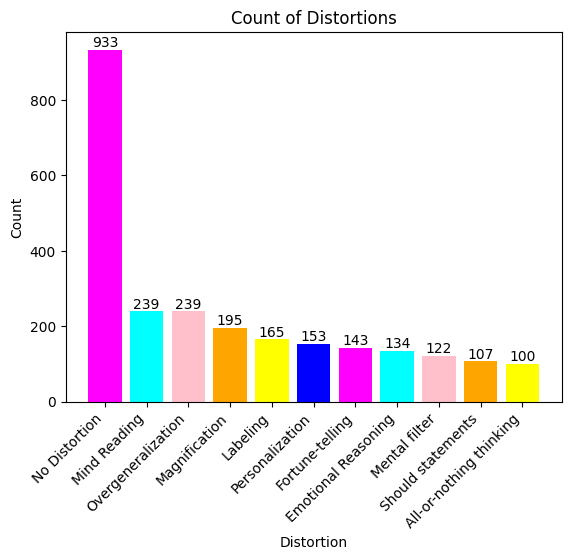

In [7]:
import matplotlib.pyplot as plt

distortion_counts = data['Dominant Distortion'].value_counts()

colors=['magenta', 'cyan', 'pink', 'orange', 'yellow', 'blue']

plt.bar(distortion_counts.index, distortion_counts.values, color=colors)
plt.xlabel('Distortion')
plt.ylabel('Count')
plt.title('Count of Distortions')

# Add value labels to each bar
for i, v in enumerate(distortion_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')

plt.show()


In [8]:
import nltk

data['num_of_characters'] = data['Patient Question'].apply(lambda x:len(x))  #compute the length of characters and add new column

data['num_of_words'] = data['Patient Question'].apply(lambda x: len(nltk.word_tokenize(x))) # counting the number of words in each text and adding it as a column.

data['num_of_sentences'] = data['Patient Question'].apply(lambda x: len(nltk.sent_tokenize(x))) # counting the number of sentences in each text and adding it as a column.

data[['num_of_characters', 'num_of_words', 'num_of_sentences']].describe()

print(data.head())

   Id_Number                                   Patient Question  \
0          0  From a teen in Australia: This story is incred...   
1          1  From a woman in the U.S.: My Therapist of eigh...   
2          2  I don’t even really know where to start. For t...   
3          3  From a woman in the UK: Hi, I have a 4 month o...   
4          4  Me and my sister in law are both pregnant righ...   

                                      Distorted part  Dominant Distortion  \
0  We grew close quickly and for some reason I ju...  Emotional Reasoning   
1  She knew I think and I believe she felt betray...         Mind Reading   
2  For the past 7 months I’ve been under extreme ...   Overgeneralization   
3  I’m worried about disruption to our relationsh...      Fortune-telling   
4  And they are always all over my sister in laws...        Mental filter   

  Secondary Distortion (Optional)  num_of_characters  num_of_words  \
0                             NaN                502           1

In [9]:
data[['num_of_characters', 'num_of_words', 'num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,2530.000000,2530.00000,2530.000000
mean,869.805138,194.08498,9.301581
std,593.128039,132.60900,7.181566
min,161.000000,32.00000,1.000000
25%,424.250000,95.00000,4.000000
50%,654.000000,147.00000,7.000000
75%,1159.000000,256.00000,12.000000
max,5657.000000,1299.00000,83.000000


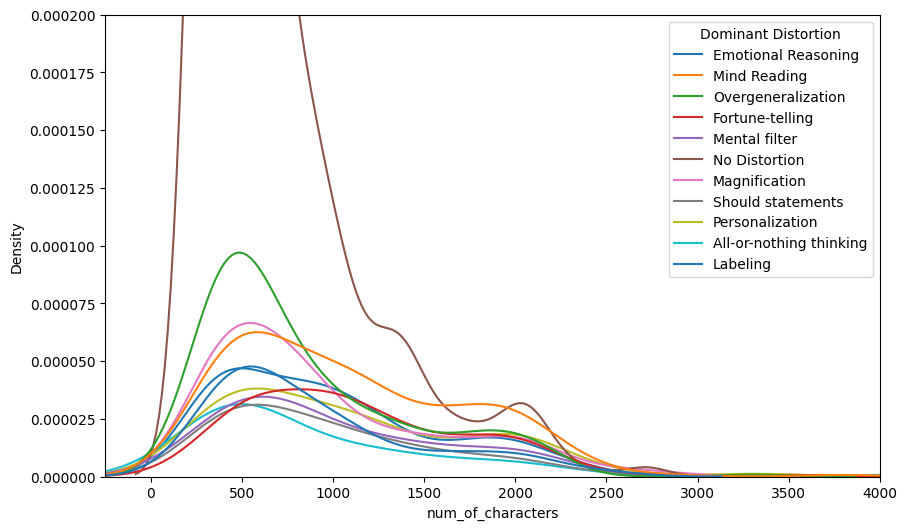

In [10]:
import seaborn as sns

fig = plt.figure(figsize=(10,6))
sns.kdeplot(x=data['num_of_characters'], hue=data['Dominant Distortion'], palette='tab10')
plt.xlim(-250, 4000)
plt.ylim(0, 0.0002)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

def train_test_model(vectorizer, model, data):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data['Patient Question'], data['Dominant Distortion'], test_size=0.2, random_state=42)

    # Preprocess the text data and vectorize using the provided vectorizer
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Train the model on the training data
    model.fit(X_train_vectorized, y_train)

    # Predict the labels for the testing data
    y_pred = model.predict(X_test_vectorized)

    # Calculate the F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Output the F1-score
    print(f"F1-score: {f1}")
    return f1


In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# GaussianNB(), MLPClassifier(),

# Create a list of vectorizers to test
vectorizers = [CountVectorizer(), TfidfVectorizer(), HashingVectorizer()]

# Create a list of models to test
models = [MultinomialNB(), BernoulliNB(), LogisticRegression(), SGDClassifier(), SVC(), LinearSVC(),
          DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(),
          KNeighborsClassifier(), GradientBoostingClassifier()]

# Array to store results
results = []
result = 0

# Iterate over each vectorizer
for vectorizer in vectorizers:
    print(f"\n\nUsing {vectorizer.__class__.__name__}:\n")

    # Iterate over each model
    for model in models:
        print(f"\nUsing {model.__class__.__name__}:")

        # try to train and test the model and store the F1-score. Skip if it fails
        try:
            result = train_test_model(vectorizer, model, data)
        except:
            # If the model fails, print failed, store the result as 0 and continue to the next model
            result = 0
            print("Failed")
        results.append([vectorizer.__class__.__name__, model.__class__.__name__, result])



Using CountVectorizer:


Using MultinomialNB:
F1-score: 0.23267131578505543

Using BernoulliNB:
F1-score: 0.23993606026041833

Using LogisticRegression:


c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score: 0.3080293442557655

Using SGDClassifier:
F1-score: 0.2738828132091924

Using SVC:
F1-score: 0.22001747015931886

Using LinearSVC:


c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


F1-score: 0.290729874277918

Using DecisionTreeClassifier:
F1-score: 0.268878824036612

Using RandomForestClassifier:
F1-score: 0.2224463759059395

Using AdaBoostClassifier:
F1-score: 0.26313418431412405

Using KNeighborsClassifier:
F1-score: 0.24811047623571938

Using GradientBoostingClassifier:
F1-score: 0.2709141752331031


Using TfidfVectorizer:


Using MultinomialNB:
F1-score: 0.19576943537177605

Using BernoulliNB:
F1-score: 0.23993606026041833

Using LogisticRegression:
F1-score: 0.257028197072088

Using SGDClassifier:
F1-score: 0.3047893512284738

Using SVC:
F1-score: 0.20872839706513047

Using LinearSVC:


c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


F1-score: 0.32008059671716466

Using DecisionTreeClassifier:
F1-score: 0.2383051124256261

Using RandomForestClassifier:
F1-score: 0.2203372831002565

Using AdaBoostClassifier:
F1-score: 0.2357456243412997

Using KNeighborsClassifier:
F1-score: 0.20360823124189018

Using GradientBoostingClassifier:
F1-score: 0.2561289349418716


Using HashingVectorizer:


Using MultinomialNB:
Failed

Using BernoulliNB:
F1-score: 0.19576943537177605

Using LogisticRegression:
F1-score: 0.251836518889811

Using SGDClassifier:
F1-score: 0.3210309999215858

Using SVC:
F1-score: 0.20508144787105106

Using LinearSVC:


c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


F1-score: 0.3084140773049409

Using DecisionTreeClassifier:
F1-score: 0.25794624125366716

Using RandomForestClassifier:
F1-score: 0.21247840885502975

Using AdaBoostClassifier:
F1-score: 0.21604661370333247

Using KNeighborsClassifier:
F1-score: 0.23284525180491839

Using GradientBoostingClassifier:
F1-score: 0.25864298154258336


C:\Users\meaps\AppData\Local\Temp\ipykernel_123616\2763012943.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scores = resultsDF[resultsDF['F1-Score'] != 0].groupby('Model').mean()
C:\Users\meaps\AppData\Local\Temp\ipykernel_123616\2763012943.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDF = resultsDF.append(average_scores)


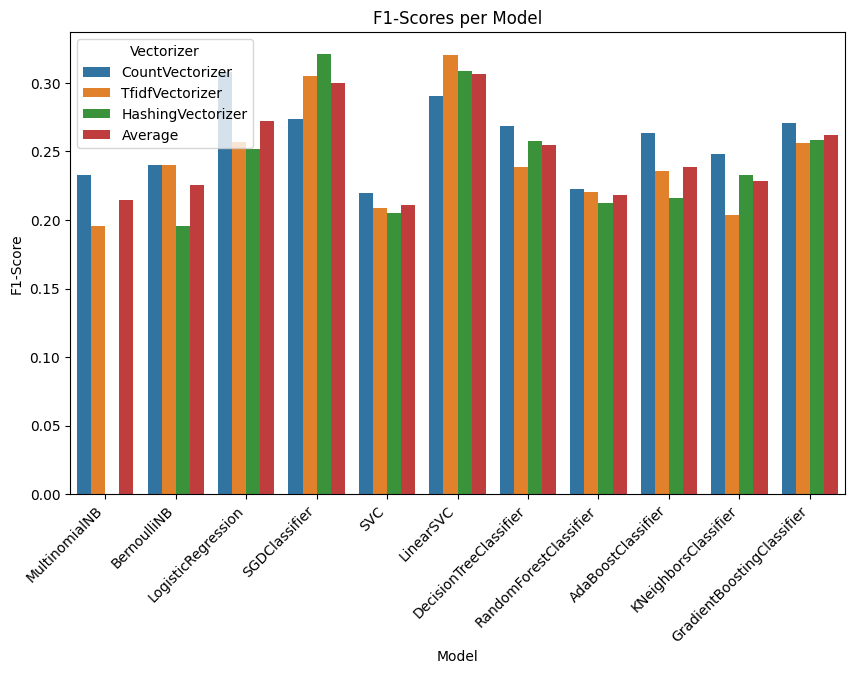

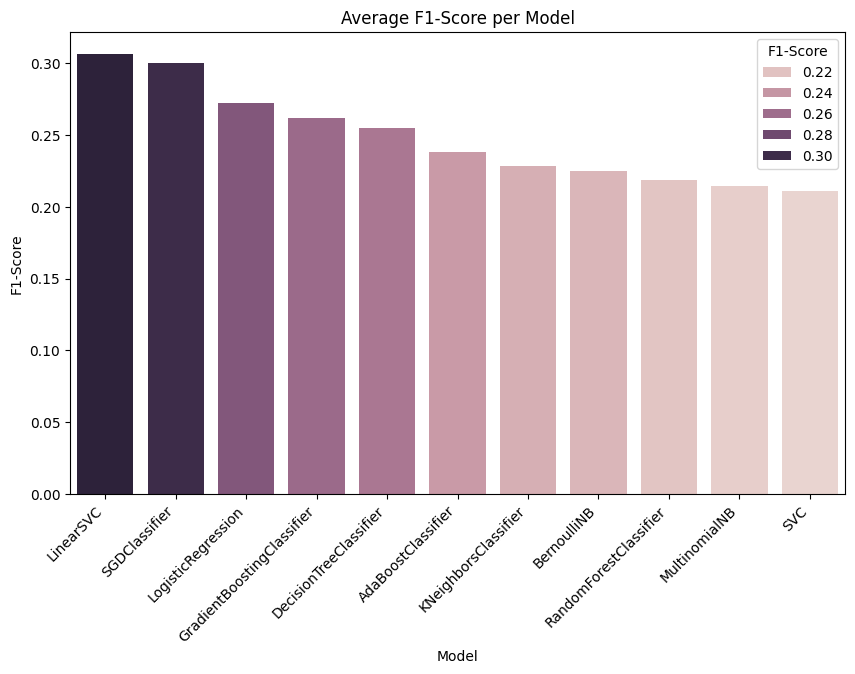

In [10]:
# Create a dataframe from the results
resultsDF = pd.DataFrame(results, columns=['Vectorizer', 'Model', 'F1-Score'])

# Calculate the average F1-score for each model. Don't include any results that are 0 in the average
average_scores = resultsDF[resultsDF['F1-Score'] != 0].groupby('Model').mean()

# Insert a new column with the average F1-score for each model, with the Vectorizer column set to 'Average'
average_scores.insert(1, 'Vectorizer', 'Average')

# Instead of the index being the model names, reset it to a range index and make it be a column instead named "Model"
average_scores.rename(columns={'index': 'Model'}, inplace=True)
average_scores.reset_index(inplace=True)

# Append the average scores to the resultsDF
resultsDF = resultsDF.append(average_scores)

# Plot the updated resultsDF
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', hue='Vectorizer', data=resultsDF)
plt.xticks(rotation=45, ha='right')
plt.title('F1-Scores per Model')
plt.show()

# Sort and plot the Average F1-Score for each model
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', hue='F1-Score', data=average_scores.sort_values('F1-Score', ascending=False))
plt.xticks(rotation=45, ha='right')
plt.title('Average F1-Score per Model')
plt.show()


F1-score: 0.3162189714119351
[[  0   3   1   1   1  12   8   3   4   0   3]
 [  0  12   4   3   1  25   1   0   1   1   1]
 [  3   2   7   1   0  24   5   1   3   0   2]
 [  3   4   1   4   2   7   1   1   2   0   0]
 [  2   1   1   0   1   9   2   0   0   0   1]
 [  5   5   3   4   1 148   8   2   5   0   4]
 [  0   3   2   0   0  22   8   0   5   2   1]
 [  1   1   1   2   1   4   1   3   4   0   0]
 [  1   1   2   1   3  14   1   2   5   0   0]
 [  1   2   5   1   2   9   1   1   1   0   0]
 [  2   0   5   1   0  18   1   1   2   2   0]]


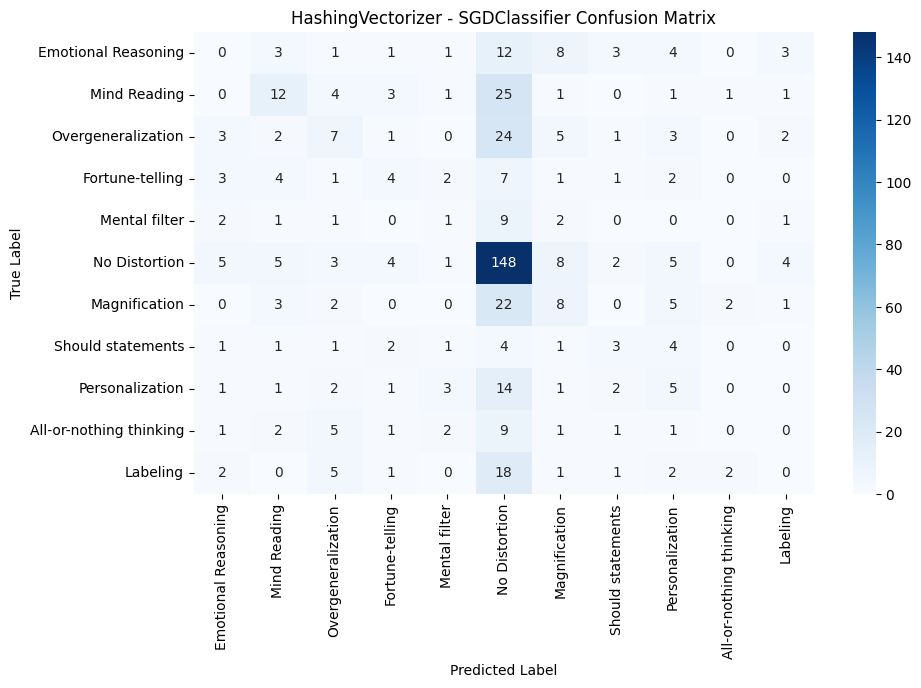

In [11]:
from sklearn.metrics import confusion_matrix
# Sort the resultsDF by F1-Score in descending order
best_combination = resultsDF.sort_values('F1-Score', ascending=False).iloc[0]

# Get the best vectorizer and model
best_vectorizer = best_combination['Vectorizer']
best_model = best_combination['Model']

# Create the vectorizer and model objects
vectorizer = eval(best_vectorizer)()
model = eval(best_model)()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Patient Question'], data['Dominant Distortion'], test_size=0.2, random_state=42)

# Preprocess the text data and vectorize using the provided vectorizer
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the model on the training data
model.fit(X_train_vectorized, y_train)

# Predict the labels for the testing data
y_pred = model.predict(X_test_vectorized)

# Calculate the F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Output the F1-score
print(f"F1-score: {f1}")

# Find the labels for the confusion matrix
labels = data['Dominant Distortion'].unique()

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Print the confusion matrix
print(cm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title(best_combination['Vectorizer'] + ' - ' + best_combination['Model'] + ' Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [1]:
# Baseline for Decision Tree, Random Forest, Gradient Boosting, AdaBoost, MLP, and KNN with CountVectorizer and TfidfVectorizer with enable_halving_search_cv
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Create a list of models to test
models = [DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), MLPClassifier(), KNeighborsClassifier()]

# Create a list of vectorizers to test
vectorizers = [CountVectorizer(), TfidfVectorizer()]

# Array to store results
results = []

param_grid_dict = {
    'DecisionTreeClassifier': {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'RandomForestClassifier': {'n_estimators': [100, 200, 300, 400, 500], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'GradientBoostingClassifier': {'n_estimators': [100, 200, 300, 400, 500], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7, 9], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'AdaBoostClassifier': {'n_estimators': [50, 100], 'learning_rate': [0.1, 1.0], 'algorithm': ['SAMME', 'SAMME.R']},
    'MLPClassifier': {'hidden_layer_sizes': [(100,), (200,), (300,)], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'alpha': [0.0001, 0.001, 0.01], 'learning_rate': ['constant', 'invscaling', 'adaptive']},
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
}

# Iterate over each vectorizer
for vectorizer in vectorizers:
    print(f"\n\nUsing {vectorizer.__class__.__name__}:\n")

    # Iterate over each model
    for model in models:
        print(f"\nUsing {model.__class__.__name__}:")

        # Create a HalvingGridSearchCV object with the model and vectorizer
        search = HalvingGridSearchCV(model, param_grid_dict[model.__class__.__name__], cv=5, n_jobs=-1, verbose=1)

        # try to train and test the model and store the F1-score. Skip if it fails
        try:
            result = train_test_model(vectorizer, search, data)
        except:
            # If the model fails, print failed, store the result as 0 and continue to the next model
            result = 0
            print("Failed")
        results.append([vectorizer.__class__.__name__, model.__class__.__name__, result])
    
# Create a dataframe from the results
resultsDF = pd.DataFrame(results, columns=['Vectorizer', 'Model', 'F1-Score'])

# Calculate the average F1-score for each model. Don't include any results that are 0 in the average
average_scores = resultsDF[resultsDF['F1-Score'] != 0].groupby('Model').mean()

# Insert a new column with the average F1-score for each model, with the Vectorizer column set to 'Average'
average_scores.insert(1, 'Vectorizer', 'Average')

# Instead of the index being the model names, reset it to a range index and make it be a column instead named "Model"
average_scores.rename(columns={'index': 'Model'}, inplace=True)
average_scores.reset_index(inplace=True)

# Append the average scores to the resultsDF
resultsDF = resultsDF.append(average_scores)

# Plot the updated resultsDF
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', hue='Vectorizer', data=resultsDF)
plt.xticks(rotation=45, ha='right')
plt.title('F1-Scores per Model')
plt.show()



Using CountVectorizer:


Using DecisionTreeClassifier:
Failed

Using RandomForestClassifier:
Failed

Using GradientBoostingClassifier:
Failed

Using AdaBoostClassifier:
Failed

Using MLPClassifier:
Failed

Using KNeighborsClassifier:
Failed


Using TfidfVectorizer:


Using DecisionTreeClassifier:
Failed

Using RandomForestClassifier:
Failed

Using GradientBoostingClassifier:
Failed

Using AdaBoostClassifier:
Failed

Using MLPClassifier:
Failed

Using KNeighborsClassifier:
Failed


NameError: name 'pd' is not defined

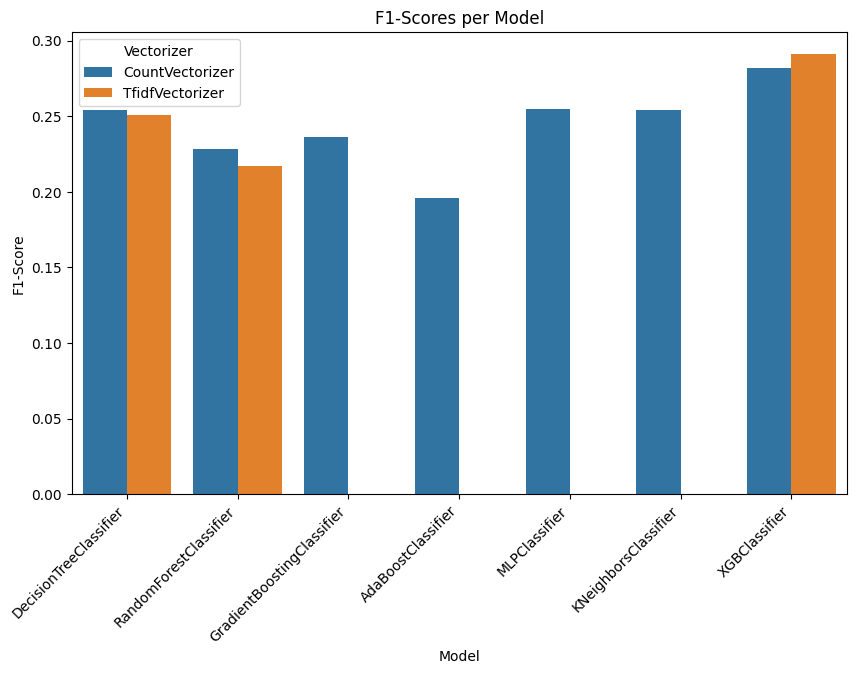

In [50]:
#TODO:
# - try an RNN and XGBoost classification model
# - try the best models to see what their F1-scores are
# - try to undersample the no distortion class to see if it improves the F1-score
# - "oversample"

# CountVectorizer:
# DecisionTreeClassifier: 0.2538
# RandomForestClassifier: 0.2282
# GradientBoostingClassifier: 0.236
# AdaBoostClassifier: 0.1958
# MLPClassifier: 0.255
# KNeighborsClassifier: 0.2538

# TfidfVectorizer:
# DecisionTreeClassifier: 0.251
# RandomForestClassifier: 0.2172
# GradientBoostingClassifier: failed

# Graph based on the results:

# data
dataModels = {
    'Vectorizer': ['CountVectorizer', 'CountVectorizer', 'CountVectorizer', 'CountVectorizer', 'CountVectorizer', 'CountVectorizer', 'TfidfVectorizer', 'TfidfVectorizer', 'TfidfVectorizer', 'CountVectorizer'],
    'Model': ['DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'AdaBoostClassifier', 'MLPClassifier', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBClassifier', 'XGBClassifier'],
    'F1-Score': [0.2538, 0.2282, 0.236, 0.1958, 0.255, 0.2538, 0.251, 0.2172, 0.2911, 0.2819]
}

# Create a DataFrame
df = pd.DataFrame(dataModels)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', hue='Vectorizer', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('F1-Scores per Model')
plt.show()


In [48]:
# XGBoost classification model
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Patient Question'], data['Dominant Distortion'], test_size=0.2, random_state=42)

# Create a label encoder object
le = LabelEncoder()

# Fit the encoder to the training labels
y_train_encoded = le.fit_transform(y_train)

# Transform the testing labels
y_test_encoded = le.transform(y_test)

# Create the vectorizer and model objects
vectorizer = TfidfVectorizer()
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(le.classes_), n_jobs=-1)

# Preprocess the text data and vectorize using the provided vectorizer
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the model on the training data
model.fit(X_train_vectorized, y_train_encoded)

# Predict the labels for the testing data
y_pred = model.predict(X_test_vectorized)

# Calculate the F1-score
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

# Output the F1-score
print(f"F1-score: {f1}")

F1-score: 0.28783337253416397


In [45]:
# hyperparameter tuning on XGBoost
from sklearn.model_selection import RandomizedSearchCV, HalvingGridSearchCV
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import xgboost as xgb
from scipy.stats import randint, uniform

# Create a dictionary of parameters to test using only arrays
params = {
    'learning_rate': [0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
    'min_child_weight': [1, 3]
    
}

"""

    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
    'min_child_weight': [1, 3]
"""

# Create a HalvingGridSearchCV and a RandomizedSearchCV object with the model and vectorizer
search = HalvingGridSearchCV(xgb.XGBClassifier(objective='multi:softmax', num_class=len(le.classes_), n_jobs=-1), params, cv=5, n_jobs=-1, verbose=1)
#search = RandomizedSearchCV(xgb.XGBClassifier(objective='multi:softmax', num_class=len(le.classes_), n_jobs=-1), params, n_iter=100, cv=5, n_jobs=-1, verbose=1)

# Train and test the model
search.fit(X_train_vectorized, y_train_encoded)

# Predict the labels for the testing data
y_pred = search.predict(X_test_vectorized)

# Calculate the F1-score
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

# Output the F1-score
print(f"F1-score: {f1}")

# Print the best parameters
print(search.best_params_)

# best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.5}
# F1-score: 0.2911

n_iterations: 3
n_required_iterations: 5
n_possible_iterations: 3
min_resources_: 110
max_resources_: 2024
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 162
n_resources: 110
Fitting 5 folds for each of 162 candidates, totalling 810 fits
----------
iter: 1
n_candidates: 54
n_resources: 330
Fitting 5 folds for each of 54 candidates, totalling 270 fits
----------
iter: 2
n_candidates: 18
n_resources: 990
Fitting 5 folds for each of 18 candidates, totalling 90 fits
F1-score: 0.2910699648805377
{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.5}


In [51]:
# Try XGBoost with the best parameters on CountVectorizer

# Create the vectorizer and model objects
vectorizer = CountVectorizer()
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(le.classes_), n_jobs=-1, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5)

# Preprocess the text data and vectorize using the provided vectorizer
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the model on the training data
model.fit(X_train_vectorized, y_train_encoded)

# Predict the labels for the testing data
y_pred = model.predict(X_test_vectorized)

# Calculate the F1-score
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

# Output the F1-score
print(f"F1-score: {f1}")

F1-score: 0.28190532798431145


In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

distortion_data = data[data['Dominant Distortion'] != 'No Distortion']

# Create a list of vectorizers to test
vectorizers = [CountVectorizer(), TfidfVectorizer()]

# Create a list of models to test
models = [MultinomialNB(), BernoulliNB(), LogisticRegression(), SGDClassifier(), SVC(), LinearSVC(),
          DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(),
          KNeighborsClassifier()]

# Array to store results
results = []
result = 0

# Iterate over each vectorizer
for vectorizer in vectorizers:
    print(f"\n\nUsing {vectorizer.__class__.__name__}:\n")

    # Iterate over each model
    for model in models:
        print(f"\nUsing {model.__class__.__name__}:")

        # try to train and test the model and store the F1-score. Skip if it fails
        try:
            result = train_test_model(vectorizer, model, distortion_data)
        except:
            # If the model fails, print failed, store the result as 0 and continue to the next model
            result = 0
            print("Failed")
        results.append([vectorizer.__class__.__name__, model.__class__.__name__, result])



Using CountVectorizer:


Using MultinomialNB:
F1-score: 0.17445026065438463

Using BernoulliNB:
F1-score: 0.1316051263138484

Using LogisticRegression:


c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score: 0.17273947761154282

Using SGDClassifier:
F1-score: 0.21338126441205346

Using SVC:
F1-score: 0.1608842782788756

Using LinearSVC:


c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


F1-score: 0.19950079694674355

Using DecisionTreeClassifier:
F1-score: 0.13872604329037624

Using RandomForestClassifier:
F1-score: 0.17938910057510457

Using AdaBoostClassifier:
F1-score: 0.13840885470637312

Using KNeighborsClassifier:
F1-score: 0.13602655719585915


Using TfidfVectorizer:


Using MultinomialNB:
F1-score: 0.08901334269662921

Using BernoulliNB:
F1-score: 0.1316051263138484

Using LogisticRegression:
F1-score: 0.20330513594530517

Using SGDClassifier:
F1-score: 0.21335089617117528

Using SVC:
F1-score: 0.14478735471466173

Using LinearSVC:


c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


F1-score: 0.21427680370167712

Using DecisionTreeClassifier:
F1-score: 0.18104749707242634

Using RandomForestClassifier:
F1-score: 0.18386125673172776

Using AdaBoostClassifier:
F1-score: 0.14853820455595534

Using KNeighborsClassifier:
F1-score: 0.15889866672655323


C:\Users\meaps\AppData\Local\Temp\ipykernel_8368\3082136351.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scores = resultsDF[resultsDF['F1-Score'] != 0].groupby('Model').mean()
C:\Users\meaps\AppData\Local\Temp\ipykernel_8368\3082136351.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDF = resultsDF.append(average_scores)


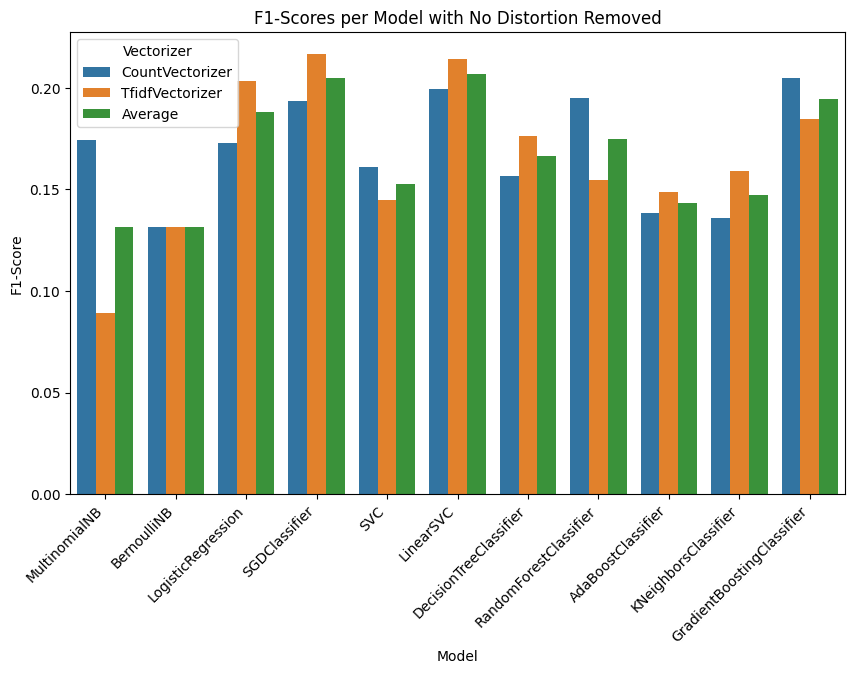

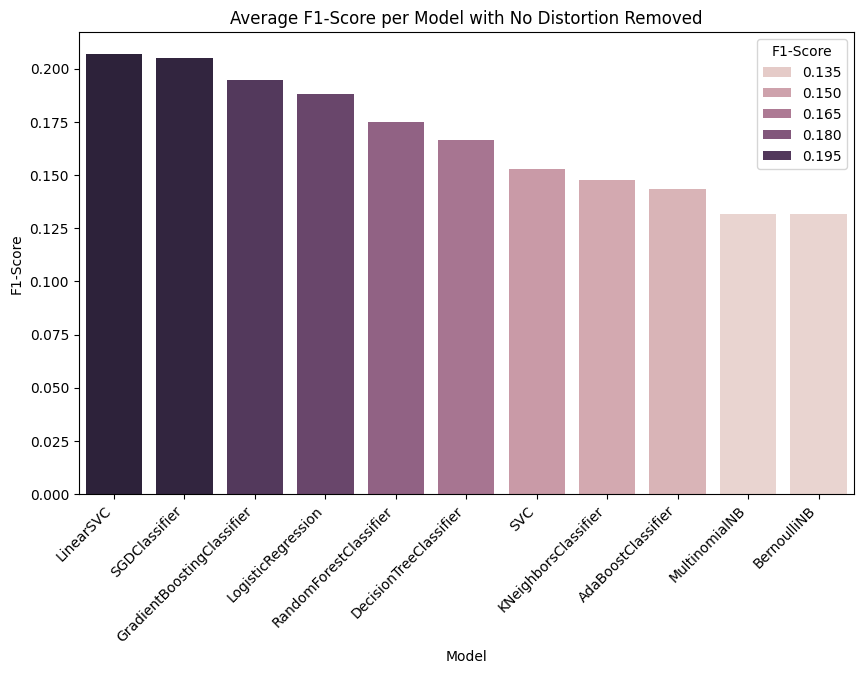

In [ ]:
# Create a dataframe from the results
resultsDF = pd.DataFrame(results, columns=['Vectorizer', 'Model', 'F1-Score'])

# Calculate the average F1-score for each model. Don't include any results that are 0 in the average
average_scores = resultsDF[resultsDF['F1-Score'] != 0].groupby('Model').mean()

# Insert a new column with the average F1-score for each model, with the Vectorizer column set to 'Average'
average_scores.insert(1, 'Vectorizer', 'Average')

# Instead of the index being the model names, reset it to a range index and make it be a column instead named "Model"
average_scores.rename(columns={'index': 'Model'}, inplace=True)
average_scores.reset_index(inplace=True)

# Append the average scores to the resultsDF
resultsDF = resultsDF.append(average_scores)

# Plot the updated resultsDF
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', hue='Vectorizer', data=resultsDF)
plt.xticks(rotation=45, ha='right')
plt.title('F1-Scores per Model with No Distortion Removed')
plt.show()

# Sort and plot the Average F1-Score for each model
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', hue='F1-Score', data=average_scores.sort_values('F1-Score', ascending=False))
plt.xticks(rotation=45, ha='right')
plt.title('Average F1-Score per Model with No Distortion Removed')
plt.show()


c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


F1-score: 0.2608415237196805


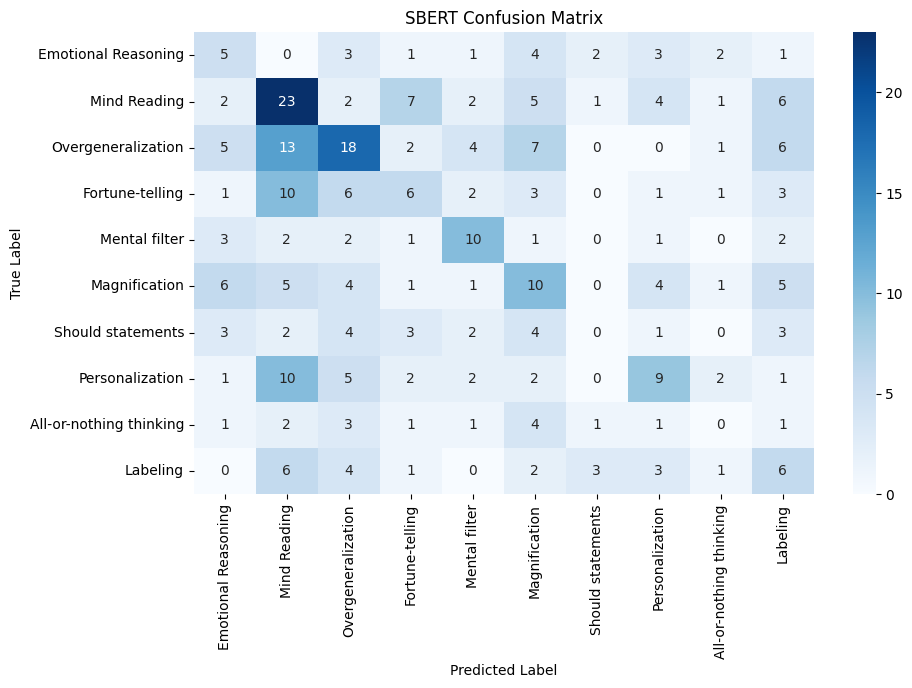

In [30]:
# Use SBERT to create sentence embeddings instead of CountVectorizer or TfidfVectorizer
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np
from sklearn.svm import LinearSVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load the SBERT model
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

distortion_data = data[data['Dominant Distortion'] != 'No Distortion']
distortion_data = distortion_data.reset_index(drop=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(distortion_data['Patient Question'], distortion_data['Dominant Distortion'], test_size=0.2, random_state=42)

# Get the sentence embeddings for the training and testing data
X_train_embeddings = model.encode(X_train.tolist())
X_test_embeddings = model.encode(X_test.tolist())

# Create a LinearSVM model
model = LinearSVC()

# Train the model on the training data
model.fit(X_train_embeddings, y_train)

# Predict the labels for the testing data
y_pred = model.predict(X_test_embeddings)

# Calculate the F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Output the F1-score
print(f"F1-score: {f1}")

# Plot the confusion matrix as a heatmap
labels = distortion_data['Dominant Distortion'].unique()
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('SBERT Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [13]:
def train_test_model_data(model, X_train_vectorized, X_test_vectorized, y_train, y_test):

    # Train the model on the training data
    model.fit(X_train_vectorized, y_train)

    # Predict the labels for the testing data
    y_pred = model.predict(X_test_vectorized)

    # Calculate the F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Output the F1-score
    print(f"F1-score: {f1}")
    return f1

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

distortion_data = data[data['Dominant Distortion'] != 'No Distortion']
distortion_data = distortion_data.reset_index(drop=True)

# Create a list of vectorizers to test
vectorizers = [SentenceTransformer('mixedbread-ai/mxbai-embed-large-v1')]
#vectorizers = [SentenceTransformer('sentence-transformers/all-mpnet-base-v2'), SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')]
#                                            0                                                                       1

# Create a list of models to test
models = [MultinomialNB(), BernoulliNB(), LogisticRegression(), SGDClassifier(), SVC(), LinearSVC(),
          DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(),
          KNeighborsClassifier()]

# Array to store results
result = 0
vectorizerNum = 0

newResults = []

# Iterate over each vectorizer
for vectorizer in vectorizers:
    print(f"\n\nUsing {vectorizer.__class__.__name__}:\n")

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(distortion_data['Patient Question'], distortion_data['Dominant Distortion'], test_size=0.2, random_state=42)

    # Get the sentence embeddings for the training and testing data
    X_train_embeddings = vectorizer.encode(X_train.tolist())
    X_test_embeddings = vectorizer.encode(X_test.tolist())

    # Iterate over each model
    for model in models:
        print(f"\nUsing {model.__class__.__name__}:")

        # try to train and test the model and store the F1-score. Skip if it fails
        try:
            result = train_test_model_data(model, X_train_embeddings, X_test_embeddings, y_train, y_test)
        except:
            # If the model fails, print failed, store the result as 0 and continue to the next model
            result = 0
            print("Failed")
        newResults.append([vectorizer.__class__.__name__ + str(2), model.__class__.__name__, result])
    vectorizerNum += 1

modules.json: 100%|██████████| 229/229 [00:00<?, ?B/s] 
c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\meaps\.cache\huggingface\hub\models--mixedbread-ai--mxbai-embed-large-v1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
config_sentence_tra



Using SentenceTransformer:


Using MultinomialNB:
Failed

Using BernoulliNB:
F1-score: 0.2340615065266231

Using LogisticRegression:


c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score: 0.2084197943680369

Using SGDClassifier:
F1-score: 0.18622996127589303

Using SVC:
F1-score: 0.25520101060549194

Using LinearSVC:


c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


F1-score: 0.18118843057856487

Using DecisionTreeClassifier:
F1-score: 0.1619828063840718

Using RandomForestClassifier:
F1-score: 0.22182142727156556

Using AdaBoostClassifier:
F1-score: 0.15083628829653112

Using KNeighborsClassifier:
F1-score: 0.16454524462527736


C:\Users\meaps\AppData\Local\Temp\ipykernel_8368\2788589887.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scores = resultsDF[resultsDF['F1-Score'] != 0].groupby('Model').mean()
C:\Users\meaps\AppData\Local\Temp\ipykernel_8368\2788589887.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDF = resultsDF.append(average_scores)


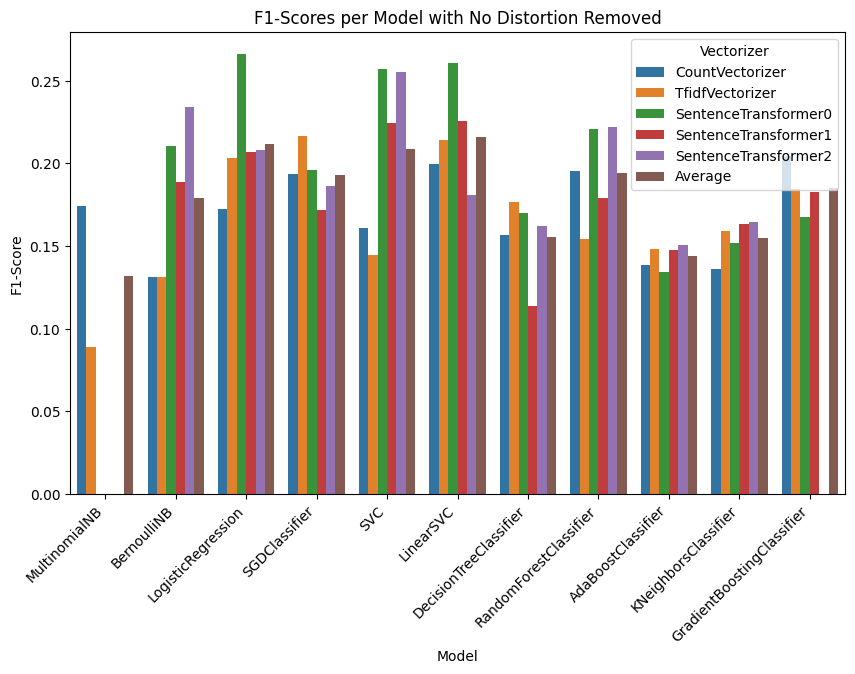

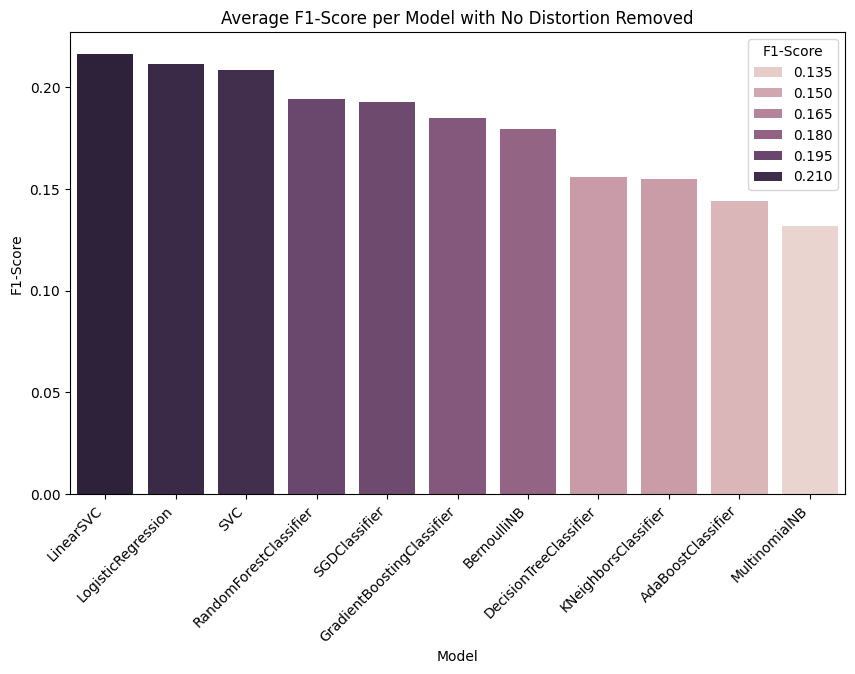

In [51]:
# append the new results to the results
results.extend(newResults)

# Create a dataframe from the results
resultsDF = pd.DataFrame(results, columns=['Vectorizer', 'Model', 'F1-Score'])

# Calculate the average F1-score for each model. Don't include any results that are 0 in the average
average_scores = resultsDF[resultsDF['F1-Score'] != 0].groupby('Model').mean()

# Insert a new column with the average F1-score for each model, with the Vectorizer column set to 'Average'
average_scores.insert(1, 'Vectorizer', 'Average')

# Instead of the index being the model names, reset it to a range index and make it be a column instead named "Model"
average_scores.rename(columns={'index': 'Model'}, inplace=True)
average_scores.reset_index(inplace=True)

# Append the average scores to the resultsDF
resultsDF = resultsDF.append(average_scores)

# Plot the updated resultsDF
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', hue='Vectorizer', data=resultsDF)
plt.xticks(rotation=45, ha='right')
plt.title('F1-Scores per Model with No Distortion Removed')
plt.show()

# Sort and plot the Average F1-Score for each model
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', hue='F1-Score', data=average_scores.sort_values('F1-Score', ascending=False))
plt.xticks(rotation=45, ha='right')
plt.title('Average F1-Score per Model with No Distortion Removed')
plt.show()

In [16]:
distortion_data = data[data['Dominant Distortion'] != 'No Distortion']
distortion_data = distortion_data.reset_index(drop=True)

# Create a list of vectorizers to test
vectorizers = [SentenceTransformer('intfloat/multilingual-e5-large-instruct', cache_folder="N:\AI\Transformers_cache")]


In [19]:

# Create a list of models to test
models = [MultinomialNB(), BernoulliNB(), LogisticRegression(), SGDClassifier(), SVC(), LinearSVC(),
          DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(),
          KNeighborsClassifier()]

# Array to store results
result = 0
vectorizerNum = 0

newResults = []

# Iterate over each vectorizer
for vectorizer in vectorizers:
    print(f"\n\nUsing {vectorizer.__class__.__name__}:\n")

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(distortion_data['Patient Question'], distortion_data['Dominant Distortion'], test_size=0.2, random_state=42)

    # Get the sentence embeddings for the training and testing data
    X_train_embeddings = vectorizer.encode(X_train.tolist())
    X_test_embeddings = vectorizer.encode(X_test.tolist())

    # Iterate over each model
    for model in models:
        print(f"\nUsing {model.__class__.__name__}:")

        # try to train and test the model and store the F1-score. Skip if it fails
        try:
            result = train_test_model_data(model, X_train_embeddings, X_test_embeddings, y_train, y_test)
        except:
            # If the model fails, print failed, store the result as 0 and continue to the next model
            result = 0
            print("Failed")
        newResults.append([vectorizer.__class__.__name__ + str(2), model.__class__.__name__, result])
    vectorizerNum += 1



Using SentenceTransformer:


Using MultinomialNB:
Failed

Using BernoulliNB:
F1-score: 0.22054502795123807

Using LogisticRegression:
F1-score: 0.21061149176506805

Using SGDClassifier:
F1-score: 0.21050358160426672

Using SVC:
F1-score: 0.180221528444183

Using LinearSVC:


c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


F1-score: 0.2613377236798847

Using DecisionTreeClassifier:
F1-score: 0.12016520238489392

Using RandomForestClassifier:
F1-score: 0.18516162993023397

Using AdaBoostClassifier:
F1-score: 0.13117413319528165

Using KNeighborsClassifier:
F1-score: 0.16993216307595552


C:\Users\meaps\AppData\Local\Temp\ipykernel_39568\2788589887.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scores = resultsDF[resultsDF['F1-Score'] != 0].groupby('Model').mean()
C:\Users\meaps\AppData\Local\Temp\ipykernel_39568\2788589887.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDF = resultsDF.append(average_scores)


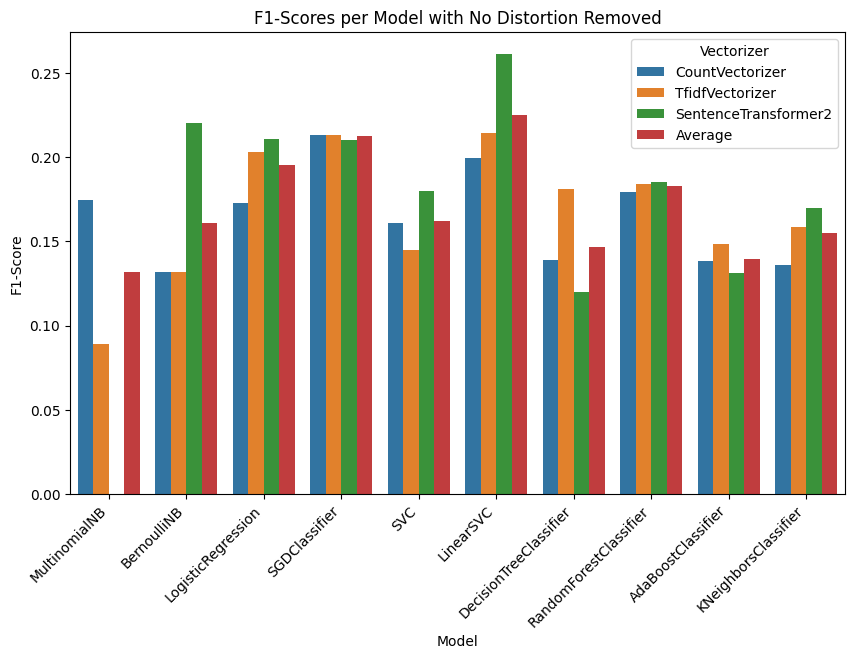

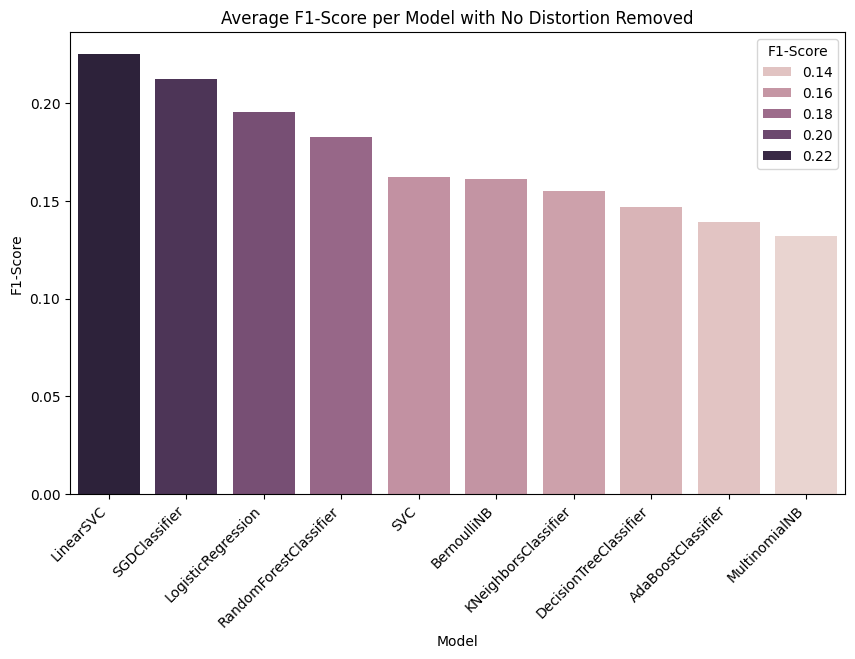

In [20]:
# append the new results to the results
results.extend(newResults)

# Create a dataframe from the results
resultsDF = pd.DataFrame(results, columns=['Vectorizer', 'Model', 'F1-Score'])

# Calculate the average F1-score for each model. Don't include any results that are 0 in the average
average_scores = resultsDF[resultsDF['F1-Score'] != 0].groupby('Model').mean()

# Insert a new column with the average F1-score for each model, with the Vectorizer column set to 'Average'
average_scores.insert(1, 'Vectorizer', 'Average')

# Instead of the index being the model names, reset it to a range index and make it be a column instead named "Model"
average_scores.rename(columns={'index': 'Model'}, inplace=True)
average_scores.reset_index(inplace=True)

# Append the average scores to the resultsDF
resultsDF = resultsDF.append(average_scores)

# Plot the updated resultsDF
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', hue='Vectorizer', data=resultsDF)
plt.xticks(rotation=45, ha='right')
plt.title('F1-Scores per Model with No Distortion Removed')
plt.show()

# Sort and plot the Average F1-Score for each model
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', hue='F1-Score', data=average_scores.sort_values('F1-Score', ascending=False))
plt.xticks(rotation=45, ha='right')
plt.title('Average F1-Score per Model with No Distortion Removed')
plt.show()

   Id_Number                                   Patient Question  \
0          0  From a teen in Australia: This story is incred...   
1          1  From a woman in the U.S.: My Therapist of eigh...   
2          2  I don’t even really know where to start. For t...   
3          3  From a woman in the UK: Hi, I have a 4 month o...   
4          4  Me and my sister in law are both pregnant righ...   

                                      Distorted part  Dominant Distortion  \
0  We grew close quickly and for some reason I ju...  Emotional Reasoning   
1  She knew I think and I believe she felt betray...         Mind Reading   
2  For the past 7 months I’ve been under extreme ...   Overgeneralization   
3  I’m worried about disruption to our relationsh...      Fortune-telling   
4  And they are always all over my sister in laws...        Mental filter   

  Secondary Distortion (Optional)  num_of_characters  num_of_words  \
0                             NaN                502           1

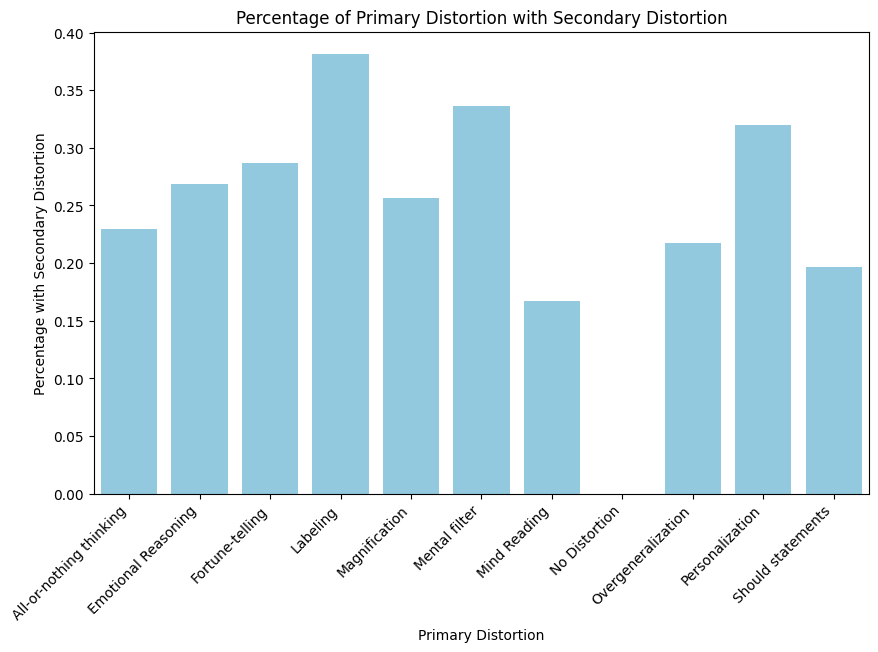

In [18]:

# TODO: see what percent of each primary distortion class has a secondary distortion

# print the first 5 rows of the data which have no secondary distortion
print(data.head())

# If the secondary distortion is NaN, replace it with 'No Secondary Distortion'
data['Secondary Distortion (Optional)'].fillna('No Secondary Distortion', inplace=True)

# Create a new column that is True if the Secondary Distortion is not empty
data['Has Secondary Distortion'] = data['Secondary Distortion (Optional)'].apply(lambda x: x != 'No Secondary Distortion')

# Get the counts of each Primary Distortion class
primary_distortion_counts = data['Dominant Distortion'].value_counts()

# Get the counts of each Primary Distortion class that has a Secondary Distortion
secondary_distortion_counts = data[data['Has Secondary Distortion'] == True]['Dominant Distortion'].value_counts()

# Calculate the percentage of each Primary Distortion class that has a Secondary Distortion
percentages = secondary_distortion_counts / primary_distortion_counts

# Plot the percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=percentages.index, y=percentages.values, color='skyblue')
plt.xlabel('Primary Distortion')
plt.ylabel('Percentage with Secondary Distortion')
plt.title('Percentage of Primary Distortion with Secondary Distortion')
plt.xticks(rotation=45, ha='right')
plt.show()


Using MultinomialNB:
F1-score: 0.5173804430466421

Using LogisticRegression:
F1-score: 0.7230841320993521

Using SVC:
F1-score: 0.7302472126858341

Using DecisionTreeClassifier:
F1-score: 0.6206193381287899

Using RandomForestClassifier:
F1-score: 0.694186561769583

Using KNeighborsClassifier:
F1-score: 0.6068457284959008

Using MLPClassifier:
F1-score: 0.6862667488717515

Using LinearSVC:
F1-score: 0.729266082125294


c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


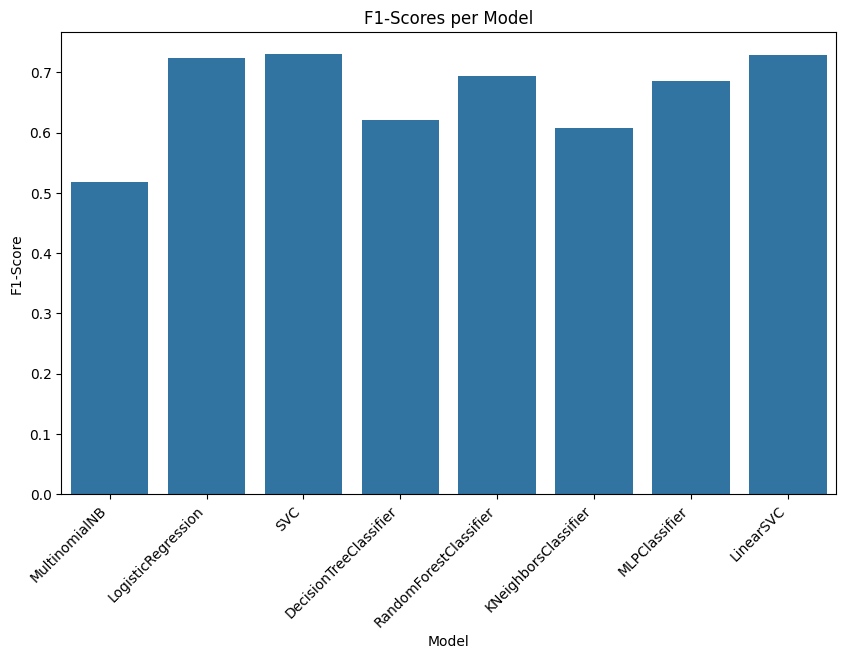

In [15]:
# create a baseline for the binary classification method
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Annotated_data.csv')
discreteData = data[['Id_Number', 'Patient Question', 'Dominant Distortion']].copy()
discreteData.loc[discreteData['Dominant Distortion'] != 'No Distortion', 'Dominant Distortion'] = 'Distorted'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(discreteData['Patient Question'], discreteData['Dominant Distortion'], test_size=0.2, random_state=42)

# Create a tfidf object
vectorizer = TfidfVectorizer()

# Preprocess the text data and vectorize using the provided vectorizer
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Create a list of models to test
models = [MultinomialNB(), LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), MLPClassifier(), LinearSVC()]

# Array to store results
results = []

# Iterate over each model
for model in models:
    print(f"\nUsing {model.__class__.__name__}:")

    # try to train and test the model and store the F1-score. Skip if it fails
    try:
        result = train_test_model_data(model, X_train_vectorized, X_test_vectorized, y_train, y_test)
    except:
        # If the model fails, print failed, store the result as 0 and continue to the next model
        result = 0
        print("Failed")
    results.append([model.__class__.__name__, result])

# Create a dataframe from the results
resultsDF = pd.DataFrame(results, columns=['Model', 'F1-Score'])

# Plot the resultsDF
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', data=resultsDF)
plt.xticks(rotation=45, ha='right')
plt.title('F1-Scores per Model')
plt.show()